# Understanding CIFAR Data

CIFAR is a dataset that consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. It is a more general dataset compared to MNIST and suitable for a more complex image recognition problem.

We're going to follow a similar process as we did with the MNIST dataset to prepare this data for our neural network.


In [ ]:
# Import the necessary modules from specific libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


The first part of the script is dedicated to importing the necessary modules from the libraries we're going to use. TensorFlow and Keras are two of the most commonly used libraries for building deep learning models. We import the CIFAR-10 dataset from Keras. The matplotlib library is used for plotting, and we'll use numpy for mathematical operations.



In [ ]:
# Helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


These helper functions are defined to help visualize the data in the CIFAR-10 dataset. The show_min_max function prints the minimum and maximum values in an image, which can help understand the data range. The plot_image function is used to display an image from the dataset, along with its label.



In [ ]:
img_rows = 32
img_cols = 32

num_classes = 10

input_shape = (img_rows, img_cols, 3)

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


We specify some constants regarding the images' dimensions and the number of classes in the CIFAR-10 dataset. The CIFAR-10 dataset, containing 60,000 32x32 color images in 10 classes, is loaded using cifar10.load_data().



(50000, 32, 32, 3)
(10000, 32, 32, 3)


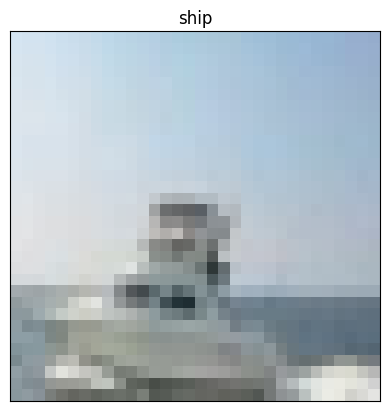

min and max value in image:  30 242


In [ ]:
# Define the names of labels in CIFAR-10 dataset
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Flatten the label lists
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

print(train_images.shape)
print(test_images.shape)

# Display the image at index 100 and the min and max pixel values of it
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)


The code defines the labels corresponding to the ten classes in the CIFAR-10 dataset. It flattens the label lists and prints the shape of the training and test images. The image at index 100 and the min and max pixel values of it are displayed.



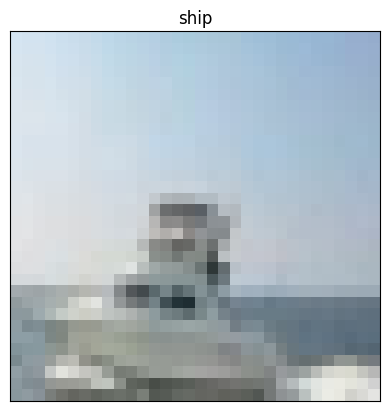

min and max value in image:  0.11764706 0.9490196


In [ ]:
# Convert the image matrices into float32 type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the pixel values
train_images /= 255
test_images /= 255

# Display the image at index 100 and the min and max pixel values of it after normalization
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

# Convert the labels into categorical type
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


This section converts the images to floating-point numbers and normalizes them so that pixel values are between 0 and 1, which is an important preprocessing step for neural network inputs. It then converts the labels into one-hot vectors, which are binary matrices representing the class of each image.



In [ ]:
# Import the necessary modules to build the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


Here, we import the necessary modules to build our CNN model using Keras.



In [ ]:
epochs = 15
batch_size = 64

# Initiate the model
model = Sequential()


We then define some hyperparameters for the model training, such as the number of epochs (the number of times the model will go through the entire training dataset) and the batch size (the number of training examples utilized in one iteration). The Sequential model is a linear stack of layers that we can start adding to.



In [ ]:
# Build the CNN model
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

After building our CNN model, we use model.summary() to print a summary representation of the model. This will show the structure of the model, layer-by-layer, along with the number of parameters (weights and biases) in each layer.



In [ ]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


The model is compiled with the Adam optimizer, a commonly used optimizer because of its computational efficiency and good performance on a wide range of problems. The categorical cross-entropy is used as the loss function which is suitable for multi-class classification problems. The metric used to evaluate the model is accuracy, the fraction of images that are correctly classified.



In [ ]:
# Train the model
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)


Epoch 1/15
782/782 [==============================] - 24s 13ms/step - loss: 1.5333 - accuracy: 0.4563 - val_loss: 1.1958 - val_accuracy: 0.5720
Epoch 2/15
782/782 [==============================] - 9s 12ms/step - loss: 1.0656 - accuracy: 0.6201 - val_loss: 1.2949 - val_accuracy: 0.5709
Epoch 3/15
782/782 [==============================] - 9s 11ms/step - loss: 0.8855 - accuracy: 0.6853 - val_loss: 0.9707 - val_accuracy: 0.6713
Epoch 4/15
782/782 [==============================] - 13s 16ms/step - loss: 0.7762 - accuracy: 0.7248 - val_loss: 0.8731 - val_accuracy: 0.6994
Epoch 5/15
782/782 [==============================] - 9s 12ms/step - loss: 0.7046 - accuracy: 0.7502 - val_loss: 0.9768 - val_accuracy: 0.6713
Epoch 6/15
782/782 [==============================] - 9s 12ms/step - loss: 0.6524 - accuracy: 0.7702 - val_loss: 0.7252 - val_accuracy: 0.7605
Epoch 7/15
782/782 [==============================] - 9s 11ms/step - loss: 0.5978 - accuracy: 0.7883 - val_loss: 0.9631 - val_accuracy: 0.69

The model is trained using the fit function, which fits the model to the training data. Here, the model learns to associate the images with labels. It also validates the model on a holdout dataset, the test set, after each epoch.



In [ ]:
# Evaluate the model
scores = model.evaluate(test_images, test_labels,verbose=0)
print('Test accuracy:', scores[1])


Test accuracy: 0.7912999987602234


Once the model has been trained, it's important to evaluate its performance on a dataset it hasn't seen before. This is done by using the evaluate function to assess the model's performance on the test dataset.



In [ ]:
# Save the model
model.save('my_model.h5')


Finally, we save the trained model as an HDF5 file, which is the format preferred by Keras. It will include the model architecture, optimizer, and also the states of all model weights. We can reload the model later with the function keras.models.load_model(filepath).

This entire script demonstrates how to build, train, and evaluate a deep learning model for image classification using Keras. The specific model used is a convolutional neural network, which is well-suited for image data.

If you would like to test your model, you can find an image of one of the possible outputs, upload it here, and then run the command below. I will not get into the details of the program below because it is not that difficult to replicate and is just there to see how your model did with an image you inputed.

In [ ]:
import keras.utils as image
from PIL import Image,ImageChops
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load in the original data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

print("CIFAR10 data loaded")

label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

# This will work for the models if you download them from the links above.
# If you want to export your own models, use the name of them here instead.
model_1 = tf.keras.models.load_model('my_model.h5')
# model_2 = tf.keras.models.load_model('cnn_model.h5')

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" This is " + label_names[labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.show()

def predict_image(model, x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose=0)
  print("Predicted Label: ", label_names[np.argmax(image_predict)])

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()

  # uncomment this like if you want to see the array of predictions
  # print(image_predict)
  return image_predict


def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()


# Code to load an image called 'test3w.jpg'
# To use a different image upload it and change the name here.
path = "testfrog.jpg"
img = image.load_img(path, target_size=(32,32), color_mode = "rgb")
x = image.img_to_array(img)
true_label = 6

# Predicting the label using model_1.
p_arr = predict_image(model_1, x)
# This will plot the values on a graph. The last argument is the height of the y-axis.
plot_value_array(p_arr, true_label, 1)

# Displaying the 100th image from the original dataset
plot_image(test_images, 100, test_labels_backup)

# Predicting the label using model_1 on an image from test_images
img_loc = 100
img = test_images[img_loc]
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
true_label = test_labels_backup[img_loc]
print(true_label)
plot_value_array(p_arr, true_label, 1)

# Create an array of random numbers from 0 to 255 of size (32, 32, 3)
x = np.random.randint(0, 255, (32, 32, 3) )
